In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [2]:
train = pd.read_csv('Y:/DATAE/thesis/FRCNNX/train.csv')
train.head()

,image_names,cell_types,xmin,xmax,ymin,ymax
0,00204.jpg,sperm,66,83,85,112
1,00204.jpg,sperm,193,50,212,79
2,00204.jpg,sperm,134,57,153,86
3,00204.jpg,sperm,29,106,48,135
4,00204.jpg,sperm,10,41,29,70


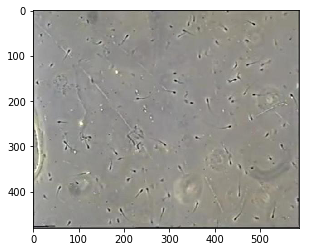

In [3]:
image = plt.imread('Y:/DATAE/thesis/FRCNNX/images/00204.jpg')
plt.imshow(image)

In [4]:
train['image_names'].nunique()

10

In [5]:
train['cell_types'].value_counts()

sperm    1132
Name: cell_types, dtype: int64

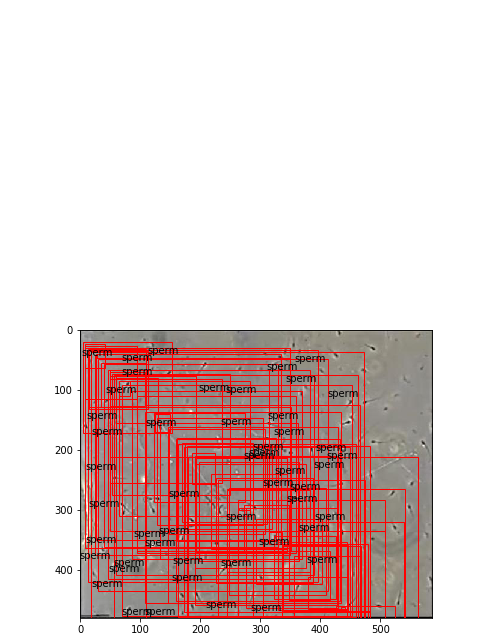

In [6]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('Y:/DATAE/thesis/FRCNNX/images/00205.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_names == "00205.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_types == 'sperm':
        edgecolor = 'r'
        ax.annotate('sperm', xy=(xmax-40,ymin+20))
#     elif row.cell_type == 'WBC':
#         edgecolor = 'b'
#         ax.annotate('WBC', xy=(xmax-40,ymin+20))
#     elif row.cell_type == 'Platelets':
#         edgecolor = 'g'
#         ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)
